In [9]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
%%time
#load the training and test data sets
house_train = pd.read_csv(r'C:\Users\neera\Documents\myGitProjects\My-Projects\Santander-Bank\train.csv')

house_train.head()

Wall time: 4.07 s


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [13]:
house_test = pd.read_csv(r'C:\Users\neera\Documents\myGitProjects\My-Projects\Santander-Bank\test.csv')

house_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Performing EDA

In [14]:
# checking if there are any null values in training dataset

house_train.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

We can see that there are no null values, which is a good sign for us as we don't need to handle missing values

From here let us examine the distribution of dependent and few independent variables

Text(0, 0.5, 'frequency')

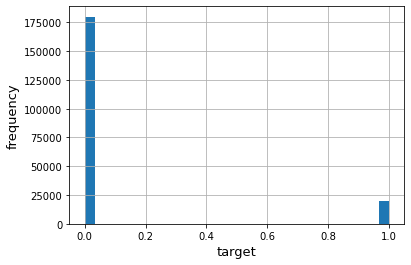

In [15]:
house_train['target'].hist(bins=30)
plt.xlabel('target', fontsize=13)
plt.ylabel('frequency', fontsize=13)

From the above plot we can observe that the training data has almost 90% of the customers who didn't make any transaction, Now this might be difficult for us because of the bias it's gonna impart on our models. We are gonna deal with this later for now.

In [16]:
house_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [17]:
house_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [19]:
std_scaler = StandardScaler()

train_scaled = std_scaler.fit_transform(house_train.iloc[:,2:])

In [20]:
train_scaled

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [21]:
target_dropped = house_train.drop(['ID_code','target'], axis=1)
scaled_train = pd.DataFrame(train_scaled, columns=target_dropped.columns)

In [22]:
scaled_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


In [23]:
scaled_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.984095e-16,-3.493761e-17,-6.816742e-16,-6.580014e-17,-6.352482e-16,1.478817e-17,-9.260245e-17,6.768006e-16,-3.457373e-18,1.417617e-15,...,-1.794120e-18,2.345457e-16,1.215494e-16,1.252543e-16,-7.931561e-16,5.891176e-17,4.307943e-17,-7.464218e-16,1.394063e-16,3.308326e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.378739e+00,-3.312510e+00,-3.255758e+00,-3.345903e+00,-3.698703e+00,-3.496937e+00,-3.532923e+00,-3.275579e+00,-3.237586e+00,-2.912180e+00,...,-3.800018e+00,-3.350719e+00,-3.884107e+00,-3.786347e+00,-2.966165e+00,-3.581239e+00,-3.027477e+00,-3.198224e+00,-3.178883e+00,-3.403554e+00
25%,-7.322476e-01,-7.684882e-01,-7.545633e-01,-7.548787e-01,-7.363223e-01,-7.802162e-01,-7.399549e-01,-7.612636e-01,-7.807544e-01,-7.679231e-01,...,-7.222214e-01,-7.544853e-01,-7.021442e-01,-6.881662e-01,-7.540249e-01,-7.196264e-01,-7.792415e-01,-7.110907e-01,-6.778686e-01,-7.551204e-01
50%,-5.104015e-02,4.832475e-03,-5.119182e-02,1.393366e-02,1.843135e-02,2.952565e-02,-2.751966e-02,-2.605270e-02,3.286843e-02,5.049414e-02,...,-6.763242e-03,-2.998690e-02,-1.795060e-02,1.617635e-02,-1.142980e-02,-2.141614e-02,1.935421e-02,-2.165493e-02,2.103323e-02,4.857132e-02
75%,6.836369e-01,7.373387e-01,6.821601e-01,7.475948e-01,7.287035e-01,7.617868e-01,6.854925e-01,7.480983e-01,7.962906e-01,8.235900e-01,...,6.955751e-01,6.860521e-01,6.910499e-01,7.199428e-01,7.663868e-01,6.798025e-01,7.798153e-01,7.434083e-01,7.286782e-01,7.820795e-01
max,3.169391e+00,2.964030e+00,3.270797e+00,3.128139e+00,3.445820e+00,2.838130e+00,3.506501e+00,3.260893e+00,2.960770e+00,2.901352e+00,...,3.334816e+00,3.068899e+00,4.379381e+00,3.744977e+00,3.168908e+00,3.088768e+00,2.936766e+00,3.355213e+00,3.390432e+00,3.049173e+00


In [24]:
%%time
pca_scaled = PCA()
pca_scaled_ft = pca_scaled.fit_transform(scaled_train)

Wall time: 3.84 s


In [25]:
pca_scaled.explained_variance_ratio_

array([0.00611308, 0.00530267, 0.00529862, 0.00529673, 0.00528794,
       0.00528269, 0.00527948, 0.00527426, 0.00526566, 0.00526283,
       0.00525555, 0.00524994, 0.00524602, 0.00523687, 0.00523581,
       0.00523504, 0.00522727, 0.00522382, 0.00521927, 0.00521826,
       0.00521497, 0.00521018, 0.00520729, 0.00520242, 0.00519975,
       0.0051945 , 0.00519299, 0.00519256, 0.00518746, 0.00518349,
       0.00518289, 0.0051783 , 0.00517394, 0.00516921, 0.00516632,
       0.00516597, 0.00516242, 0.00515977, 0.00515468, 0.00515336,
       0.00514949, 0.00514498, 0.00514259, 0.00514111, 0.00513703,
       0.00513446, 0.00513183, 0.00512903, 0.00512785, 0.00512514,
       0.00511907, 0.00511775, 0.00511637, 0.00511503, 0.00510941,
       0.00510631, 0.00510588, 0.00510316, 0.00510131, 0.00509822,
       0.00509533, 0.00509268, 0.00509112, 0.005088  , 0.00508395,
       0.0050805 , 0.0050792 , 0.00507578, 0.00507203, 0.00506889,
       0.00506791, 0.00506343, 0.00506223, 0.00505915, 0.00505

From the above result, we can observe that all the features have similar variance

In [26]:
var = np.around(pca_scaled.explained_variance_ratio_, decimals=4)*100

var

array([0.61, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
       0.51, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.49, 0.49, 0.49, 0.49,
       0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49,
       0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49,
       0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.

In [27]:
cum_var = np.cumsum(var)

cum_var

array([ 0.61,  1.14,  1.67,  2.2 ,  2.73,  3.26,  3.79,  4.32,  4.85,
        5.38,  5.91,  6.43,  6.95,  7.47,  7.99,  8.51,  9.03,  9.55,
       10.07, 10.59, 11.11, 11.63, 12.15, 12.67, 13.19, 13.71, 14.23,
       14.75, 15.27, 15.79, 16.31, 16.83, 17.35, 17.87, 18.39, 18.91,
       19.43, 19.95, 20.47, 20.99, 21.5 , 22.01, 22.52, 23.03, 23.54,
       24.05, 24.56, 25.07, 25.58, 26.09, 26.6 , 27.11, 27.62, 28.13,
       28.64, 29.15, 29.66, 30.17, 30.68, 31.19, 31.7 , 32.21, 32.72,
       33.23, 33.74, 34.25, 34.76, 35.27, 35.78, 36.29, 36.8 , 37.31,
       37.82, 38.33, 38.84, 39.35, 39.86, 40.37, 40.87, 41.37, 41.87,
       42.37, 42.87, 43.37, 43.87, 44.37, 44.87, 45.37, 45.87, 46.37,
       46.87, 47.37, 47.87, 48.37, 48.87, 49.37, 49.87, 50.37, 50.87,
       51.37, 51.87, 52.37, 52.87, 53.37, 53.87, 54.37, 54.87, 55.37,
       55.87, 56.37, 56.87, 57.37, 57.87, 58.37, 58.87, 59.37, 59.87,
       60.36, 60.85, 61.34, 61.83, 62.32, 62.81, 63.3 , 63.79, 64.28,
       64.77, 65.26,

Text(0.5, 1.0, 'PCA Analysis')

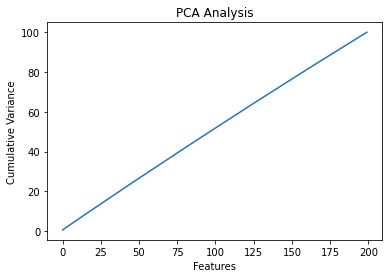

In [28]:
plt.plot(cum_var)
plt.xlabel('Features')
plt.ylabel('Cumulative Variance')
plt.title('PCA Analysis')

As from the above plot we can observe that PCA doesn't help us in reducing any dimensions as the variance explained by each feature is almost is similar. So now we'll try to work with filter methods to see if we can reduce any dimensions

From the PCA explained variances we can observe that all the features have similar variances and without any zero variance, but as the variances are similar there might be chance for multi collinearity or duplicity. So we'll check for them below and see if we can drop unwanted features

In [29]:
house_train = house_train.drop('ID_code', axis=1)

house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [30]:
%%time
var_tsld = VarianceThreshold(threshold=0)

var_ft = var_tsld.fit_transform(house_train)

Wall time: 1.11 s


In [31]:
var_ft

array([[  0.    ,   8.9255,  -6.7863, ...,   8.5635,  12.7803,  -1.0914],
       [  0.    ,  11.5006,  -4.1473, ...,   8.7889,  18.356 ,   1.9518],
       [  0.    ,   8.6093,  -2.7457, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [  0.    ,  11.2232,  -5.0518, ...,   8.7155,  13.8329,   4.1995],
       [  0.    ,   9.7148,  -8.6098, ...,  10.0342,  15.5289, -13.9001],
       [  0.    ,  10.8762,  -5.7105, ...,   8.1857,  12.1284,   0.1385]])

In [32]:
var_tsld.variances_

array([9.03917599e-02, 9.24186309e+00, 1.64027759e+01, 6.97428726e+00,
       4.17513173e+00, 2.63460124e+00, 4.98142000e+01, 7.51004399e-01,
       1.16831822e+01, 1.11063908e+01, 1.52539009e+00, 3.02585724e+01,
       3.56437438e+01, 3.61223315e-02, 2.15251820e+01, 5.05306621e+00,
       1.69505447e-01, 6.54036944e+00, 4.50589404e+01, 5.24122000e+01,
       4.75855000e+01, 3.45301873e+01, 5.91333000e+01, 8.11082387e+00,
       2.77615323e-01, 1.42675102e+01, 8.15300923e-02, 3.50723933e+01,
       2.32169343e+00, 6.13661224e-01, 6.84311577e+00, 5.04499000e+01,
       4.66510410e+00, 6.69682827e+00, 1.86823981e+01, 2.93344471e-01,
       2.68276973e+01, 9.73421302e+00, 5.06125922e+00, 1.83089179e+01,
       1.65554141e+01, 5.33173000e+01, 3.47017000e+01, 4.84401180e-01,
       9.58513239e-02, 3.48460961e+01, 1.52336900e+02, 8.18248027e+00,
       6.83716000e+01, 7.81760000e+01, 4.92237000e+01, 4.78459041e-01,
       5.57352000e+01, 2.48554076e+01, 5.84844199e-01, 5.53510000e+01,
      

In [33]:
#checking if any of the above variances are equal to zero
print(any(i == 0 for i in var_tsld.get_support()))

False


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
mm_scaler = MinMaxScaler()

train_mm_scaled = mm_scaler.fit_transform(house_train.iloc[:,1:])

In [36]:
mm_scaler.scale_

array([5.02345956e-02, 3.93387936e-02, 5.80184383e-02, 7.55943607e-02,
       8.62321715e-02, 2.00745972e-02, 1.63923677e-01, 4.47585500e-02,
       4.84102087e-02, 1.39273826e-01, 2.53797444e-02, 2.31033853e-02,
       8.19739323e-01, 3.52825782e-02, 7.18163799e-02, 3.58886018e-01,
       5.77517253e-02, 1.90817481e-02, 1.90795273e-02, 2.10148049e-02,
       2.72345247e-02, 1.69109453e-02, 5.02083647e-02, 2.72821520e-01,
       3.82783911e-02, 5.16902719e-01, 2.50512298e-02, 1.06271055e-01,
       1.49302756e-01, 5.57715153e-02, 1.98216448e-02, 5.54591183e-02,
       6.33986762e-02, 3.56657548e-02, 2.88109712e-01, 2.62863902e-02,
       4.47613548e-02, 7.66447974e-02, 2.76544084e-02, 3.34806482e-02,
       1.87556384e-02, 2.88170320e-02, 2.16891511e-01, 5.19453535e-01,
       2.26573953e-02, 6.56439773e-03, 4.97817072e-02, 1.46259558e-02,
       1.27916496e-02, 2.03154172e-02, 2.02769836e-01, 1.79419828e-02,
       2.39130331e-02, 2.04641264e-01, 1.80665209e-02, 3.04185285e-02,
      

In [37]:
train_mm_scaled

array([[0.42785307, 0.32482435, 0.56805853, ..., 0.43095798, 0.32765751,
        0.56064496],
       [0.55721218, 0.42863943, 0.6812351 , ..., 0.4682771 , 0.6095461 ,
        0.60582746],
       [0.41196889, 0.48377668, 0.57806091, ..., 0.38194973, 0.42583343,
        0.58273586],
       ...,
       [0.5432771 , 0.39305749, 0.4870996 , ..., 0.45612437, 0.38087342,
        0.63919915],
       [0.46750324, 0.25309006, 0.66682332, ..., 0.67445942, 0.46661746,
        0.37047369],
       [0.5258457 , 0.36714503, 0.580254  , ..., 0.36840624, 0.29469964,
        0.57890533]])

In [38]:
mm_scaled_train = pd.DataFrame(train_mm_scaled, columns=target_dropped.columns)

In [39]:
mm_scaled_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.556579,0.572293,0.356529,0.268693,0.454064,0.886709,0.544817,0.438719,0.478516,0.236264,...,0.621955,0.820385,0.638836,0.423154,0.485094,0.363660,0.503386,0.425842,0.524105,0.311590
199996,0.226382,0.495472,0.846379,0.504570,0.278944,0.441637,0.579126,0.727071,0.330438,0.282921,...,0.585673,0.378531,0.369513,0.452932,0.705886,0.733666,0.370246,0.129359,0.485652,0.581879
199997,0.543277,0.393057,0.487100,0.429814,0.367884,0.545106,0.361976,0.725420,0.514392,0.305344,...,0.558133,0.419055,0.566240,0.554219,0.771363,0.386767,0.476246,0.456124,0.380873,0.639199
199998,0.467503,0.253090,0.666823,0.440957,0.641783,0.664399,0.606616,0.522131,0.402429,0.666244,...,0.515682,0.584825,0.535995,0.761718,0.609398,0.543576,0.645770,0.674459,0.466617,0.370474


In [40]:
mm_scaled_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,0.500931,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,0.172013,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,0.368839,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,0.509617,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,0.642599,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
scaled_var = var_tsld.fit_transform(mm_scaled_train)

In [42]:
var_tsld.variances_

array([0.02332198, 0.02538396, 0.02347642, 0.02385882, 0.01959086,
       0.0249171 , 0.02018022, 0.02340524, 0.02602836, 0.02958829,
       0.0194905 , 0.01902543, 0.02427322, 0.02679585, 0.02606166,
       0.02183216, 0.02181384, 0.01640655, 0.02244006, 0.02824031,
       0.02561171, 0.01921309, 0.02044641, 0.02066335, 0.02090526,
       0.0217839 , 0.02201018, 0.02622013, 0.01367931, 0.02128525,
       0.02492702, 0.01434853, 0.02691718, 0.02376487, 0.02434971,
       0.01853725, 0.01950326, 0.02973199, 0.01400204, 0.01855785,
       0.02411262, 0.02928124, 0.02278717, 0.02586375, 0.01788851,
       0.01974306, 0.02027797, 0.02394453, 0.02120635, 0.02546983,
       0.01967213, 0.02157847, 0.01421315, 0.02449213, 0.02310877,
       0.02995779, 0.01810212, 0.01932775, 0.01686645, 0.02170025,
       0.02392837, 0.02344676, 0.02070232, 0.02041841, 0.02424773,
       0.0161233 , 0.01792163, 0.01561423, 0.01831537, 0.02532577,
       0.02150955, 0.02205296, 0.02210246, 0.02611496, 0.01828

In [43]:
var_tsld.get_support(indices=True)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

From the above we can understand that there are no features with '0' variance, which we already observed from PCA's variances.

Now we'll see if we can remove any quasi constant features that might provide little variance. We'll use standard rule of thumb 99% threshold value to see if we have any similar features for the output variables

In [44]:
%%time
quas_tsld = VarianceThreshold(threshold=0.01)

quas_ft = quas_tsld.fit_transform(house_train)

Wall time: 1.09 s


In [45]:
scaled_quas = quas_tsld.fit_transform(mm_scaled_train)

In [46]:
quas_tsld.variances_

array([0.02332198, 0.02538396, 0.02347642, 0.02385882, 0.01959086,
       0.0249171 , 0.02018022, 0.02340524, 0.02602836, 0.02958829,
       0.0194905 , 0.01902543, 0.02427322, 0.02679585, 0.02606166,
       0.02183216, 0.02181384, 0.01640655, 0.02244006, 0.02824031,
       0.02561171, 0.01921309, 0.02044641, 0.02066335, 0.02090526,
       0.0217839 , 0.02201018, 0.02622013, 0.01367931, 0.02128525,
       0.02492702, 0.01434853, 0.02691718, 0.02376487, 0.02434971,
       0.01853725, 0.01950326, 0.02973199, 0.01400204, 0.01855785,
       0.02411262, 0.02928124, 0.02278717, 0.02586375, 0.01788851,
       0.01974306, 0.02027797, 0.02394453, 0.02120635, 0.02546983,
       0.01967213, 0.02157847, 0.01421315, 0.02449213, 0.02310877,
       0.02995779, 0.01810212, 0.01932775, 0.01686645, 0.02170025,
       0.02392837, 0.02344676, 0.02070232, 0.02041841, 0.02424773,
       0.0161233 , 0.01792163, 0.01561423, 0.01831537, 0.02532577,
       0.02150955, 0.02205296, 0.02210246, 0.02611496, 0.01828

In [47]:
quas_tsld.get_support(indices=True)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [48]:
print(all(i >0.01 for i in quas_tsld.get_support()))

True


There are no features to remove considering quasi constant. So now we'll try to see if we have duplicate features, which I think there will be.

In [49]:
train_trns = house_train.T

train_trns

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
target,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.5580,16.1071,12.5088,...,14.1475,9.9909,12.2825,13.2152,12.3925,11.4880,4.9149,11.2232,9.7148,10.8762
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743,...,1.8568,2.5523,2.6918,-5.8006,-5.8821,-0.4956,-2.4484,-5.0518,-8.6098,-5.7105
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.6080,9.3494,13.8776,13.9307,8.8960,...,11.0066,11.9653,15.4684,9.7260,11.2323,8.2622,16.7052,10.5127,13.6104,12.1183
var_3,5.0930,5.3890,7.8928,7.1957,6.6375,8.6264,4.2916,7.5985,5.6327,5.4508,...,3.6779,6.3958,6.4262,6.5910,3.9237,3.5142,6.6345,5.6456,5.7930,8.0328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,-2.3978,2.0339,3.1417,-1.2706,-1.5121,1.0314,0.5845,-0.3776,-1.9940,0.4467,...,1.7170,0.5328,-0.2854,0.3916,-1.4843,-1.7939,1.7337,-1.5736,-0.0786,-2.4907
var_196,7.8784,8.1267,-6.5213,-2.9275,3.9267,-3.6241,9.1104,4.2178,-1.0733,14.1287,...,-4.0032,-5.3444,7.6252,6.7302,-3.9299,2.1661,-2.1651,1.2832,6.7980,-2.2342
var_197,8.5635,8.7889,8.2675,10.2922,9.5031,9.7670,9.1143,9.4237,8.1975,7.9133,...,9.1627,8.5414,10.1758,8.9709,9.1164,8.5326,6.7419,8.7155,10.0342,8.1857
var_198,12.7803,18.3560,14.7222,17.9697,17.9974,12.5809,10.8869,8.6624,19.5114,16.2375,...,13.8077,13.2895,17.4066,14.5405,16.3170,16.6660,15.9054,13.8329,15.5289,12.1284


In [50]:
%%time
trns_dup = train_trns.duplicated()

Wall time: 5min 39s


In [51]:
trns_dup

target     False
var_0      False
var_1      False
var_2      False
var_3      False
           ...  
var_195    False
var_196    False
var_197    False
var_198    False
var_199    False
Length: 201, dtype: bool

In [52]:
trns_dup.sum()

0

We observe that there are no correlated features, which is unexpected as I assumed as variances are almost similar there would be atleast duplicate features, but we'll just proceed

No we'll try to see if there's multicollinearity among the features with respect to dependent variable and see if we remove any features

In [53]:
%%time
x_corr = house_train.corr()

Wall time: 18.7 s


In [54]:
x_corr['target'].describe()

count    201.000000
mean       0.005189
std        0.077967
min       -0.080917
25%       -0.024510
50%        0.002215
75%        0.027524
max        1.000000
Name: target, dtype: float64

In [55]:
sorted_corr_trgt = x_corr['target'].sort_values(ascending=False).drop('target')

In [56]:
sorted_corr_trgt

var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 200, dtype: float64

Text(0, 0.5, 'Features')

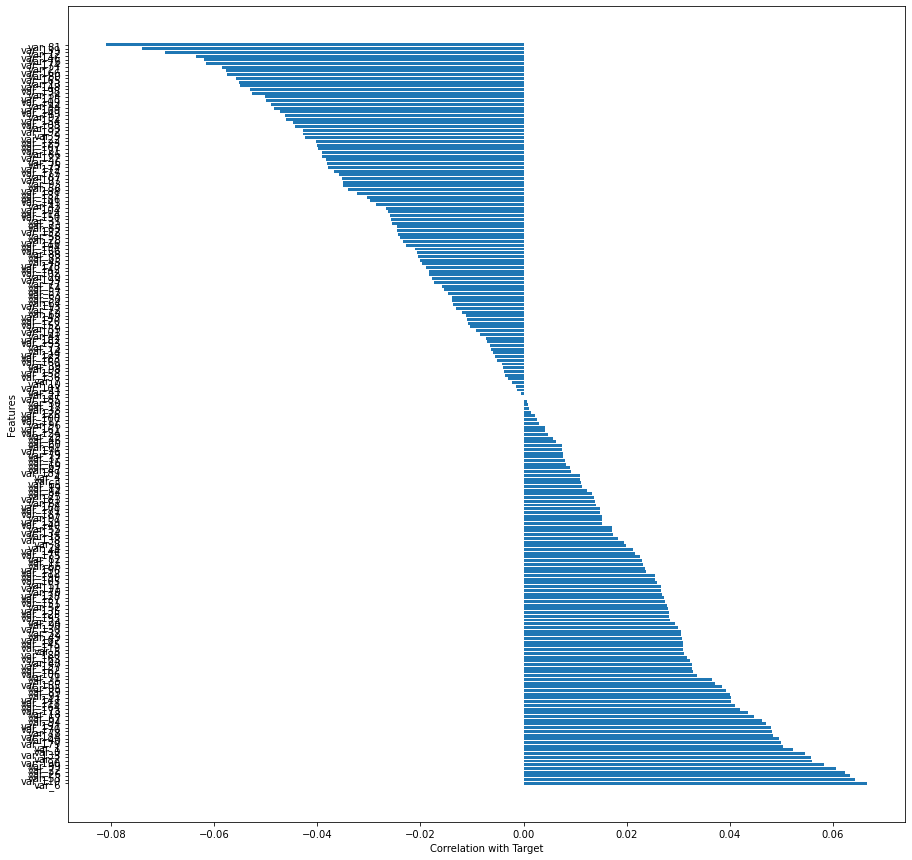

In [57]:
plt.figure(figsize=(15,15))
plt.barh(sorted_corr_trgt.index, sorted_corr_trgt.values)
plt.xlabel('Correlation with Target')
plt.ylabel('Features')

Text(0.5, 0, 'Correlation')

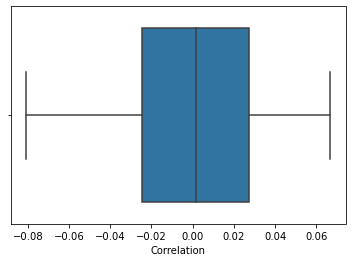

In [58]:
sns.boxplot(x=x_corr['target'].drop('target'))
plt.xlabel('Correlation')

Now we'll filter out the features having correlation values with greater than absolute value of 0.02 with target. These features have high influence on predicting the target variable.

In [59]:
selected_features = x_corr[abs(x_corr['target']) > 0.02].index.drop('target')

len(selected_features)

123

In [60]:
x_corr.loc[selected_features,selected_features]

,var_0,var_1,var_2,var_5,var_6,var_9,var_11,var_12,var_13,var_18,...,var_188,var_190,var_191,var_192,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003046,0.006983,-0.002613,0.003468,-0.001996,-0.002717,0.004292,...,0.001770,0.002752,0.000206,-0.005373,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,-0.000902,0.003258,-0.000832,0.004778,-0.001977,-0.001303,0.000289,...,-0.002185,0.006627,0.003621,-0.002604,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001569,0.000883,-0.001932,0.005180,-0.003781,-0.008795,0.003529,...,0.000008,0.000197,0.001285,-0.003400,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_5,0.003046,-0.000902,0.001569,1.000000,0.002588,-0.005279,-0.001072,-0.000325,-0.003540,0.000639,...,-0.000276,0.001466,-0.000022,0.001116,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.006983,0.003258,0.000883,0.002588,1.000000,-0.005697,-0.000549,-0.003376,-0.005506,0.001998,...,-0.002598,0.000721,0.005604,-0.002563,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,-0.001274,0.001244,-0.000868,-0.000501,0.000721,-0.006739,0.006409,...,0.001763,0.004571,0.000870,-0.004745,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,0.002880,0.005378,0.000052,0.006086,-0.002249,-0.001792,0.004927,...,0.002751,-0.000847,0.002466,-0.001386,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,-0.000535,-0.003565,0.003701,-0.005642,0.002946,-0.004304,-0.003269,...,-0.000296,-0.004974,0.000906,-0.000527,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.000953,-0.003025,0.002343,-0.000968,0.007545,-0.001896,-0.004619,...,0.001503,-0.000153,-0.000067,0.003451,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


<AxesSubplot:>

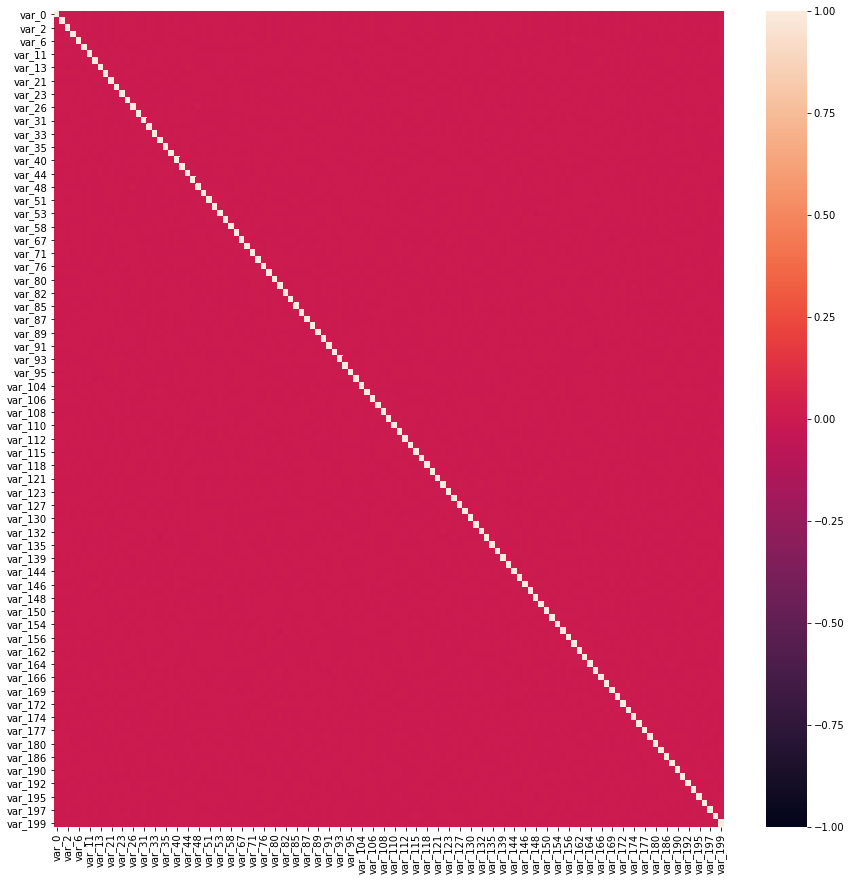

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(x_corr.loc[selected_features,selected_features], vmin = -1.0, vmax = 1.0)

In [62]:
house_train[selected_features]

,var_0,var_1,var_2,var_5,var_6,var_9,var_11,var_12,var_13,var_18,...,var_188,var_190,var_191,var_192,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,-9.2834,5.1187,5.7470,3.1821,14.0137,0.5745,4.2840,...,17.5743,4.4354,3.9642,3.1364,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,7.0433,5.6208,8.0851,8.0585,14.0239,8.4135,7.8000,...,13.3175,7.6421,7.7214,2.5837,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,-9.0837,6.9427,5.9525,-11.2648,14.1929,7.3124,4.7011,...,10.1934,2.9057,9.7905,1.6704,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,-1.8361,5.8428,8.2450,2.8102,13.8463,11.9704,15.9426,...,12.4124,4.4666,4.7433,0.7178,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,2.4486,5.9405,7.6784,-12.1419,13.8481,7.8895,6.5263,...,16.0201,-1.4905,9.5214,-0.1508,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,11.6081,5.6709,5.6669,-9.5348,13.9860,5.2982,12.0465,...,13.5058,6.1415,13.2305,3.9901,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,-10.5628,5.8802,6.0019,-11.8776,14.4131,3.3087,17.9467,...,18.6751,4.9611,4.6549,0.6998,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,-5.4086,4.5555,6.1629,-0.4651,13.8775,9.7414,23.1127,...,12.9726,4.0651,5.4414,3.1032,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,0.5339,6.0479,8.7542,0.7086,14.2110,6.5641,14.0831,...,12.6337,2.6840,8.6587,2.7337,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [63]:
house_train['target']

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [64]:
%%time
mutual_x_train = mutual_info_classif(house_train[selected_features], house_train['target'])

mutual_x_train

Wall time: 4min 52s


array([2.09698445e-03, 1.02399201e-03, 1.64437471e-03, 1.12970206e-03,
       2.14654700e-03, 1.20133151e-03, 0.00000000e+00, 3.61975237e-03,
       2.03627557e-03, 6.32700125e-04, 2.48265197e-03, 1.81745732e-03,
       0.00000000e+00, 1.30975276e-03, 2.38060290e-03, 0.00000000e+00,
       5.02661575e-04, 1.14945813e-03, 6.89879746e-05, 1.53428519e-03,
       6.26941336e-04, 5.68557359e-04, 1.60658914e-03, 0.00000000e+00,
       1.47089193e-03, 7.16007618e-04, 6.02761421e-05, 0.00000000e+00,
       1.10191765e-03, 5.78125861e-04, 2.30174969e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.30876672e-04, 1.24967748e-04,
       0.00000000e+00, 9.76699242e-04, 9.82986356e-04, 1.89946507e-03,
       3.87857513e-03, 4.38274913e-03, 7.77901260e-04, 8.59839256e-04,
       8.32689155e-04, 7.77697948e-04, 1.20504779e-03, 0.00000000e+00,
       0.00000000e+00, 7.57538667e-04, 6.45907701e-04, 2.07692435e-03,
       6.48312409e-04, 8.80776862e-04, 7.71357682e-04, 3.30370529e-03,
      

In [65]:
mutual_info = pd.Series(mutual_x_train)

In [66]:
len(mutual_info)

123

In [67]:
selected_features

Index(['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_9', 'var_11',
       'var_12', 'var_13', 'var_18',
       ...
       'var_188', 'var_190', 'var_191', 'var_192', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=123)

In [68]:
mutual_info.index = selected_features
mutual_info.sort_values(ascending=False)

var_81     0.004383
var_139    0.003961
var_80     0.003879
var_12     0.003620
var_166    0.003617
             ...   
var_56     0.000000
var_23     0.000000
var_49     0.000000
var_194    0.000000
var_135    0.000000
Length: 123, dtype: float64

In [69]:
mutual_info

var_0      0.002097
var_1      0.001024
var_2      0.001644
var_5      0.001130
var_6      0.002147
             ...   
var_195    0.000376
var_196    0.000832
var_197    0.000429
var_198    0.001188
var_199    0.001354
Length: 123, dtype: float64

<AxesSubplot:>

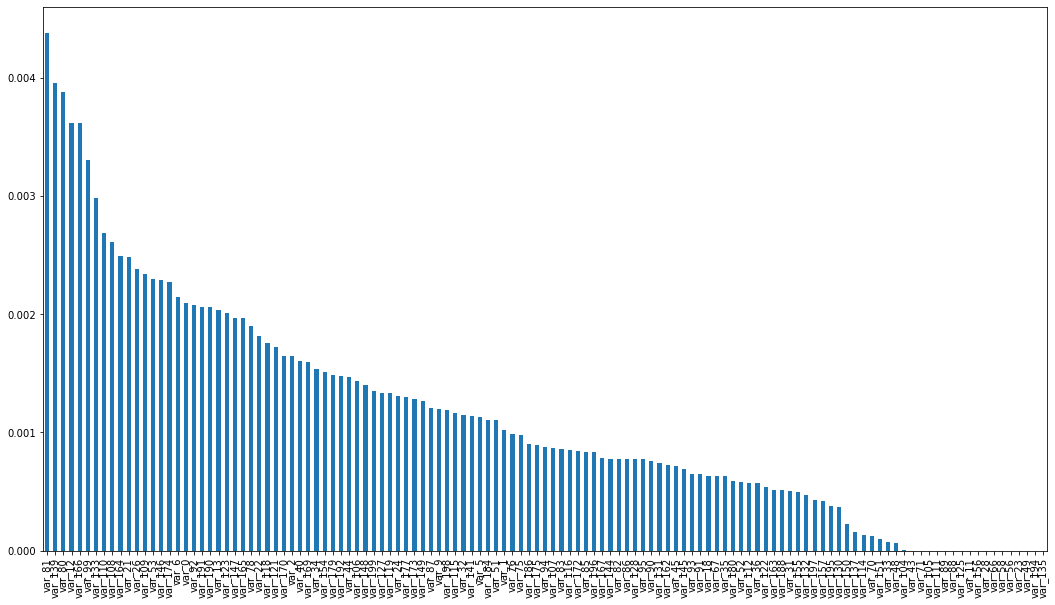

In [70]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(18,10))

Instead of selecting top few features, I'm gonna select features with mutual information of atleast 0.001 because if we select only like top 10 or 15 features, we miss a lot of collective information from remaining features. If this approach reults in greater variance when the predictions are made, we'll come back to this try selecting top features.

In [71]:
len(mutual_info[mutual_info>1.e-03])

57

We can observe that there are 60 features with mutual information value greater than 0.01, we will select these features and try to run our models. we cut down from 200 features to 60 features, I think that's pretty good

In [72]:
selected_features = mutual_info[mutual_info>1.e-03].index

In [73]:
selected_features

Index(['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_9', 'var_12',
       'var_13', 'var_21', 'var_22', 'var_24', 'var_26', 'var_32', 'var_34',
       'var_40', 'var_44', 'var_51', 'var_53', 'var_78', 'var_80', 'var_81',
       'var_87', 'var_92', 'var_99', 'var_106', 'var_108', 'var_109',
       'var_110', 'var_115', 'var_118', 'var_119', 'var_121', 'var_123',
       'var_127', 'var_133', 'var_139', 'var_141', 'var_146', 'var_147',
       'var_148', 'var_149', 'var_154', 'var_164', 'var_165', 'var_166',
       'var_169', 'var_170', 'var_173', 'var_174', 'var_177', 'var_179',
       'var_184', 'var_190', 'var_191', 'var_192', 'var_198', 'var_199'],
      dtype='object')

In [74]:
%%time
x_train, x_test, y_train, y_test = train_test_split(house_train[selected_features], house_train['target'], train_size=0.7, random_state=40)

Wall time: 134 ms


In [75]:
#x_train = x_train[selected_features]
#x_test = x_test[selected_features]

In [76]:
x_train

,var_0,var_1,var_2,var_5,var_6,var_9,var_12,var_13,var_21,var_22,...,var_173,var_174,var_177,var_179,var_184,var_190,var_191,var_192,var_198,var_199
143414,11.9421,0.8907,14.9576,-15.2528,6.1546,9.0118,14.4451,2.9456,-4.1591,4.0252,...,3.9098,29.1708,11.4226,6.3596,1.3663,9.3840,10.8688,1.9262,20.1808,-5.0766
148234,15.2109,-4.1274,17.3958,-13.0204,5.4810,6.5040,14.2050,12.2737,12.5450,-0.5106,...,-2.7295,17.8142,10.1207,3.8915,4.8432,1.2105,1.7684,2.1483,21.2750,-15.8408
13,16.3699,1.5934,16.7395,5.9004,4.8222,8.6978,13.7999,2.7925,19.4258,1.6565,...,-2.2723,15.7383,15.1929,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064,-10.8529
72779,10.7032,-3.4477,8.0603,-7.9706,5.9030,9.6517,14.0663,2.9561,21.1343,3.5473,...,-7.4825,12.1930,9.6908,0.6954,7.1999,-1.8141,4.6766,0.3622,12.0720,-14.2330
32225,9.6003,2.7803,8.7919,4.0564,6.7740,6.7170,13.5652,1.8723,30.0376,4.4408,...,4.1357,13.7773,12.0129,7.2820,7.5005,3.3870,10.5250,2.8899,16.8993,8.6394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56760,7.7224,-5.3365,11.7861,-2.0015,4.8895,8.2212,13.7613,9.2519,10.9793,4.5996,...,0.4917,2.6805,9.4066,2.6322,-4.6573,5.1790,9.8267,1.9105,11.9020,-9.7126
93176,14.8401,-5.3298,11.9953,1.9826,5.1159,7.9668,14.0479,4.8881,3.1549,5.4217,...,-13.7236,23.2609,12.4490,3.6809,23.7088,7.7025,8.6347,3.1616,14.1641,12.9618
30727,9.5414,-7.8310,12.4435,-3.5075,5.2249,8.1934,13.8068,-2.0311,27.2197,6.5487,...,-1.7077,8.3110,14.7601,-0.9347,18.4109,16.5767,9.3892,3.6800,22.3645,-2.1456
112859,6.6686,2.2621,7.4169,-7.7563,5.1636,5.9739,14.0677,12.6537,31.6402,9.3186,...,-3.9784,17.2563,9.9968,5.7688,7.0016,1.1342,7.7067,2.5304,12.2295,-10.8085


In [77]:
y_train

143414    0
148234    0
13        1
72779     0
32225     0
         ..
56760     0
93176     0
30727     0
112859    0
142662    0
Name: target, Length: 140000, dtype: int64

Now as we are ready with our features, there's one more thing we need to make sure before applying any models, which is balancing the class labels. We know already that the target variable has highly imbalanced. So we'll try to take care of that if we don't want our models to be biased.

In [78]:
sum(house_train['target'])/len(house_train['target'])

0.10049

In [79]:
y = house_train['target']

In [80]:
len(y[y==1])/len(y)

0.10049

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [110]:
lr_model = LogisticRegression(penalty='none', solver = 'sag', max_iter = 300)

def train_model(x_train, x_test, y_train, y_test, fold_num):
    lr_model.fit(x_train, y_train)
    print("Decision Function")
    len(lr_model.decision_function(x_train))
    pred = lr_model.predict(x_test)
    accr = accuracy_score(y_test, pred)
    print(f"Accuracy Score for this fold is : {accr}")
    
    conf_mat = confusion_matrix(y_test, pred)
    print(f"Confusion matrix for fold {fold_num} : '\'n {conf_mat}")
    

In [111]:
X = house_train[selected_features]
y = house_train['target']

strat_kfold = StratifiedKFold(n_splits=2)

fold_num = 1
for train_index, test_index in strat_kfold.split(X, y):
    print('fold', str(fold_num))
    
    x_train = X.loc[train_index,:]
    x_test = X.loc[test_index,:]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]
    
    print(f"class ratio in y_train = {len(y_train[y_train==1])/len(y_train)}")
    print(f"class ratio in y_test = {len(y_test[y_test==1])/len(y_test)}")
    
    #Now we'll train the model by passing the training and test data as paramenters
    train_model(x_train, x_test, y_train, y_test, fold_num)

    fold_num+=1

fold 1
class ratio in y_train = 0.10049
class ratio in y_test = 0.10049


C:\Users\neera\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Decision Function
Accuracy Score for this fold is : 0.90576
Confusion matrix for fold 1 : ''n [[89297   654]
 [ 8770  1279]]
fold 2
class ratio in y_train = 0.10049
class ratio in y_test = 0.10049
Decision Function
Accuracy Score for this fold is : 0.90581
Confusion matrix for fold 2 : ''n [[89352   599]
 [ 8820  1229]]


C:\Users\neera\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [112]:
lr_model.coef_

array([[ 0.05654931,  0.03684309,  0.06404758,  0.01375563,  0.26889935,
        -0.09217733, -0.20504866, -0.03521881, -0.02232033,  0.07238844,
         0.02757078,  0.03500409,  0.03971845, -0.22419634,  0.01833458,
        -0.02902748,  0.00794759,  0.30385515,  0.07523043, -0.02562378,
        -0.1010702 , -0.01738059, -0.03269139,  0.10000568,  0.07421012,
         0.36956071, -0.03515602,  0.05791268, -0.06117433,  0.01507039,
         0.02374729, -0.06877173, -0.02038595, -0.04118149,  0.55591569,
        -0.02986742, -0.01562055, -0.07504303,  0.0164385 , -0.62194053,
        -0.01436546, -0.02547995,  0.02125323, -0.03491466, -0.44639298,
        -0.35166564,  0.03750823,  0.02392899, -0.02587519, -0.04163653,
         0.06042374,  0.01731286,  0.04184242,  0.04928609, -0.09002747,
        -0.05524408,  0.00950531]])

In [113]:
lr_model.intercept_

array([2.25434501])

In [115]:
lr_model.penalty

'none'

In [117]:
lr_model.densify()

LogisticRegression(max_iter=300, penalty='none', solver='sag')

In [118]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 300,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [121]:
lr_fit = lr_model.fit(x_train,y_train)

C:\Users\neera\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [126]:
lr_fit.coef_

array([[ 0.056549  ,  0.03684205,  0.06404651,  0.01375503,  0.26889886,
        -0.0921778 , -0.20505266, -0.03521824, -0.02231949,  0.07238911,
         0.0275713 ,  0.03500443,  0.03971772, -0.22419666,  0.01833456,
        -0.02902739,  0.00794688,  0.30385391,  0.07522961, -0.02562484,
        -0.10107034, -0.01738082, -0.03269224,  0.10000647,  0.07421106,
         0.36955619, -0.03515665,  0.05791259, -0.06117479,  0.0150707 ,
         0.0237469 , -0.06877225, -0.02038692, -0.041183  ,  0.55591516,
        -0.02986733, -0.01562098, -0.075043  ,  0.01643876, -0.6219418 ,
        -0.01436466, -0.02548097,  0.02125257, -0.03491425, -0.4463924 ,
        -0.35166606,  0.03750873,  0.0239303 , -0.02587429, -0.04163541,
         0.06042293,  0.01731308,  0.04184247,  0.04928616, -0.09002777,
        -0.05524469,  0.0095062 ]])

In [130]:
lr_fit.intercept_

array([2.25447284])

In [114]:
lr_model.n_iter_

array([300])

In [ ]:
lr_model.decision_function

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [86]:
#rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=6, min_samples_split=3)

In [87]:
# %%time
# fit_rf = rf.fit(x_train,y_train)

In [88]:
# fit_rf

In [89]:
# help(sns.catplot)

In [90]:
# sns.catplot(data=house_train, y='var_0', x='target', kind='box')

In [91]:
# sns.barplot(data=house_train, x='target', y='var_0')